# Principal Component Analysis

# 1. PCA on Iris dataset
PCA implementation using covariance matrix method

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
print(iris['target_names'])
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df.tail()

['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [ ]:
# split data table into data X and class labels y

X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

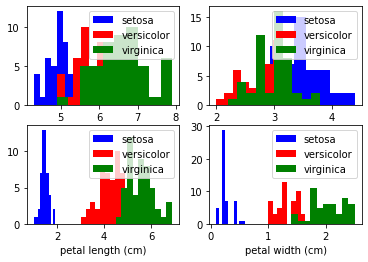

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows= 2, ncols=2)
colors= ['blue', 'red', 'green']

for i, ax in enumerate(axes.flat):
    for label, color in zip(range(len(iris['target_names'])), colors):
        ax.hist(iris.data[iris.target==label, i], label=             
                            iris.target_names[label], color=color)
        ax.set_xlabel(iris.feature_names[i])  
        ax.legend(loc='upper right')

plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [ ]:
import numpy as np
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [ ]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [ ]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]

Eigenvalues 
[2.93808505 0.9201649  0.14774182 0.02085386]


In [ ]:
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))


In [ ]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.938085050199995
0.9201649041624864
0.1477418210449475
0.020853862176462696


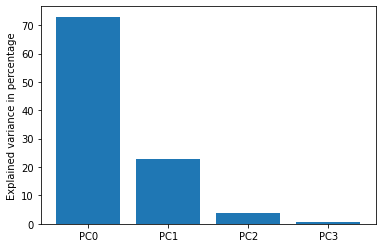

In [ ]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar([i for i in range(len(var_exp))], var_exp)
plt.xticks(np.arange(4), ['PC'+str(i) for i in range(4)])
plt.ylabel('Explained variance in percentage')
plt.show()

In [ ]:
matrix_w = np.hstack((eig_pairs[2][1].reshape(4,1), 
                      eig_pairs[3][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.71956635  0.26128628]
 [ 0.24438178 -0.12350962]
 [ 0.14212637 -0.80144925]
 [ 0.63427274  0.52359713]]


In [ ]:
Y = X_std.dot(matrix_w)

In [ ]:
new_df = pd.DataFrame(data=matrix_w, columns = ['PC0', 'PC1'])
new_df.head()

,PC0,PC1
0,-0.719566,0.261286
1,0.244382,-0.123510
2,0.142126,-0.801449
3,0.634273,0.523597


## Now using sklearn's PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pcs = pca.fit_transform(X_std)
new_df = pd.DataFrame(data = pcs, columns=['PC'+str(i) for i in range(2)])
new_df.head()

,PC0,PC1
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


# 2. PCA on student data
PCA implementation using correlation matrix

In [ ]:
df = pd.read_csv('dataset.csv')
df.head()

,sem1,sem2,sem3,sem4,sem5,sem6,sem7,Travel,Hobby,Study,Room,comp_exam,Higher_studies,placement,extra_curr,CET
0,9.54,9.58,9.87,10.00,9.00,9.09,9.33,0,0,2,1,0,0,0,0,109
1,9.04,9.15,9.57,9.86,8.95,9.09,9.38,1,1,1,1,1,0,0,1,125
2,7.00,8.00,9.35,9.71,9.00,8.91,9.21,3,1,4,0,1,0,1,1,180
3,8.69,9.23,9.61,9.71,8.91,9.09,9.38,2,1,4,1,0,1,0,1,179
4,9.00,9.50,9.48,9.67,9.00,9.13,8.83,3,0,3,1,1,0,1,1,172


In [ ]:
features = ['sem1','sem2','sem3','sem4','sem5','sem6','Travel','Study','Hobby','Room','comp_exam','Higher_studies','placement','extra_curr','CET']
labels = 'sem7'
X = df[features]
Y = df[labels]

In [ ]:
X.head()

,sem1,sem2,sem3,sem4,sem5,sem6,Travel,Study,Hobby,Room,comp_exam,Higher_studies,placement,extra_curr,CET
0,9.54,9.58,9.87,10.00,9.00,9.09,0,2,0,1,0,0,0,0,109
1,9.04,9.15,9.57,9.86,8.95,9.09,1,1,1,1,1,0,0,1,125
2,7.00,8.00,9.35,9.71,9.00,8.91,3,4,1,0,1,0,1,1,180
3,8.69,9.23,9.61,9.71,8.91,9.09,2,4,1,1,0,1,0,1,179
4,9.00,9.50,9.48,9.67,9.00,9.13,3,3,0,1,1,0,1,1,172


## Normalise the data for effective PCA

In [ ]:
X_values = StandardScaler().fit_transform(X.values)
X = pd.DataFrame(data = X_values, columns = features)
X.head()

,sem1,sem2,sem3,sem4,sem5,sem6,Travel,Study,Hobby,Room,comp_exam,Higher_studies,placement,extra_curr,CET
0,1.666552,1.389031,2.087721,2.028616,2.026753,1.409014,-1.267450,-1.027752,-1.0,0.904534,-0.935414,-0.874475,-1.069045,-1.183216,-0.965944
1,0.953233,0.620821,1.286464,1.688013,1.927855,1.409014,-0.383183,-1.720619,1.0,0.904534,1.069045,-0.874475,-1.069045,0.845154,-0.408668
2,-1.957111,-1.433694,0.698875,1.323081,2.026753,1.048157,1.385352,0.357981,1.0,-1.105542,1.069045,-0.874475,0.935414,0.845154,1.506965
3,0.453909,0.763744,1.393298,1.323081,1.848736,1.409014,0.501085,0.357981,1.0,0.904534,-0.935414,1.143544,-1.069045,0.845154,1.472135
4,0.896167,1.246108,1.046086,1.225766,2.026753,1.489204,1.385352,-0.334885,-1.0,0.904534,1.069045,-0.874475,0.935414,0.845154,1.228327


In [ ]:
cor_mat2 = np.corrcoef(X.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat2)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 4.11527631e-01  1.78608779e-01  2.75725554e-01 -1.47571620e-01
   4.69481887e-01  2.66113793e-01  3.97009366e-01  2.90661195e-01
  -1.22428142e-01  2.70013288e-01  1.04415204e-01  6.19860258e-02
   1.98804830e-01 -1.59439300e-01 -5.18738515e-03]
 [ 3.76414153e-01  8.41120397e-02  2.12232347e-01 -1.17284985e-01
  -2.69043442e-01 -2.18393432e-01 -2.74052278e-01 -1.33046239e-01
  -4.81417039e-01 -3.53409613e-01  3.98324208e-02  1.83916610e-01
   3.86327098e-01 -1.91189909e-01  4.09673708e-02]
 [ 4.19746746e-01  1.37241950e-03 -1.19019508e-01 -6.25544275e-03
  -4.67731623e-02 -4.90547776e-01  1.77284562e-01 -7.86104134e-02
   5.66926167e-01 -1.34760016e-02 -3.81892929e-03  1.30307219e-01
  -1.18756572e-01 -3.39550332e-01  2.47371709e-01]
 [ 4.34708421e-01  6.48736847e-02 -2.86443402e-01  9.58662150e-02
  -2.31169987e-01  5.93551532e-01 -3.30772000e-01  2.23319147e-01
   1.29656593e-01 -1.55768508e-01  9.68131975e-02 -1.75124779e-01
  -2.16037240e-01 -1.35511107e-01  6.6361

In [ ]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, reverse=True)


# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.986928045099488
1.779099467908785
1.598396441303646
1.5110071485480008
1.0692988344308019
1.0380951245188947
0.9699344011521908
0.9024170955842682
0.777696164163468
0.5968980155473191
0.5163676613173213
0.46060908159670133
0.386515615588508
0.23043430778911983
0.17630259545149385


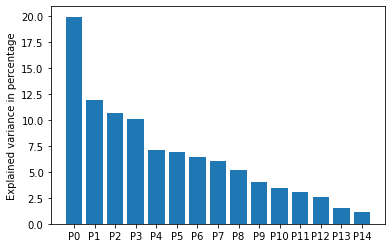

In [ ]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar([i for i in range(len(var_exp))], var_exp)
plt.xticks(np.arange(15), ['P'+str(i) for i in range(15)])
plt.ylabel('Explained variance in percentage')
plt.show()

## Making a new Dataset from principal components

In [ ]:
scaler = StandardScaler()
scaler.fit(X.values)
normX = scaler.transform(X.values)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(normX, Y, test_size=0.2, random_state=7)
model = LinearRegression()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.165217480337584

In [ ]:
components = 14
pca = PCA(n_components=components)
pcs = pca.fit_transform(normX)
new_df = pd.DataFrame(data = pcs, columns=['PC'+str(i) for i in range(components)])
new_df.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,4.371763,2.675938,0.645520,-0.275468,0.339540,0.786572,0.069056,0.057255,0.687194,0.404784,-0.464463,0.643212,-0.284390,-0.020877
1,3.518696,0.054727,1.006813,1.386069,-0.843529,1.146116,-0.410858,1.033642,0.477854,-0.191985,-0.899201,-0.167547,0.732285,0.224390
2,0.557166,-2.801335,2.191326,-1.433214,-0.150060,0.158502,1.107094,2.218767,0.250724,-0.252960,-0.406853,-0.529633,0.893067,0.882390
3,2.984986,-1.262844,0.122025,-0.288873,-0.220887,0.769024,0.088502,0.986154,-1.802059,0.937811,-0.507160,0.890638,-0.836341,0.064227
4,2.896456,-1.152480,2.232803,-0.142500,0.256130,-0.568554,-1.425533,1.070451,0.509550,-0.105291,0.942456,0.579783,-0.522779,0.055919


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(new_df, Y, test_size=0.2, random_state=7)

In [ ]:
model = LinearRegression()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.1716441458523822